In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_trees = TreeIter(list(map(Tree,fc.eightb.accstudies_no_pu.signal_list)))
signal_trees_pu = TreeIter(list(map(Tree,fc.eightb.accstudies.signal_list)))

# signal_trees.extend(kwargs=lambda tree : dict(n_ext_jet=tree.n_jet-tree.nfound_presel))
# signal_trees.extend(kwargs=eightb.reco_all)
# signal_trees.extend(kwargs=eightb.reco_res_all)

In [3]:
good_jets = CollectionFilter('jet',pt_min=20)
signal_trees = good_jets.filter(signal_trees)
signal_trees_pu = good_jets.filter(signal_trees_pu)


In [4]:
all_trees = TreeIter(list(signal_trees)+list(signal_trees_pu))

In [5]:
def get_point(label):
    label = label.split('_')
    return str((int(label[1]),int(label[3])))
signal_points = list(map(get_point,signal_trees.sample))

In [6]:
dout = "gen_studies/recojets/"

tree = signal_trees[-2]
tree_pu = signal_trees_pu[-2]

In [16]:
all_trees.extend(kwargs=lambda t : dict(
    n_ext_jets = t.n_jet - t.nfound_presel
));

In [8]:
varinfo.clear()

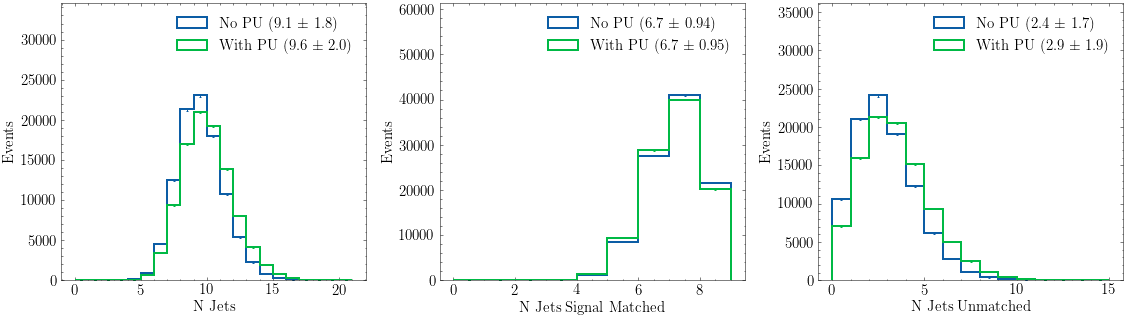

In [9]:
varlist = ['n_jet','nfound_all','n_ext_jets']
xlabels = ['N Jets','N Jets Signal Matched','N Jets Unmatched']
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    s_colors=[None],
    dim=(-1,3),
    xlabels=xlabels
)

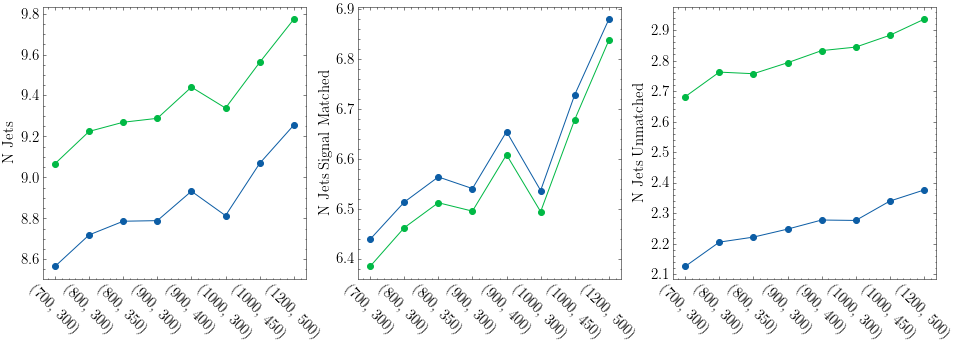

In [10]:
fig,axs = plt.subplots(ncols=3,figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylabel=xlabel,figax=(fig,axs[i]))

In [17]:
all_trees.extend(kwargs = lambda t : dict(
    n_eta_tagged = ak.sum( np.abs(t.jet_eta) < 2.4,axis=-1 ),
    n_eta_untagged = ak.sum( np.abs(t.jet_eta) > 2.4,axis=-1 ),
    n_matched_eta_tagged = ak.sum( (t.jet_signalId > -1) & (np.abs(t.jet_eta) < 2.4),axis=-1 ),
    n_matched_eta_untagged = ak.sum( (t.jet_signalId > -1) & (np.abs(t.jet_eta) > 2.4),axis=-1 ),
    n_unmatched_eta_tagged = ak.sum( (t.jet_signalId == -1) & (np.abs(t.jet_eta) < 2.4),axis=-1 ),
    n_unmatched_eta_untagged = ak.sum( (t.jet_signalId == -1) & (np.abs(t.jet_eta) > 2.4),axis=-1 ),
));

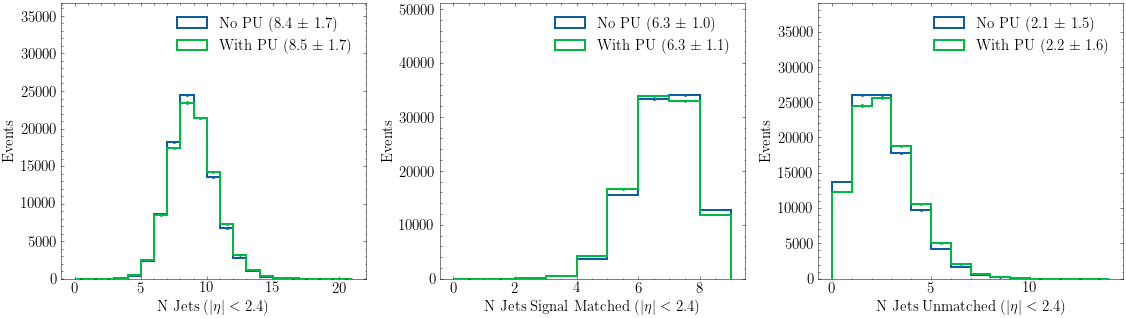

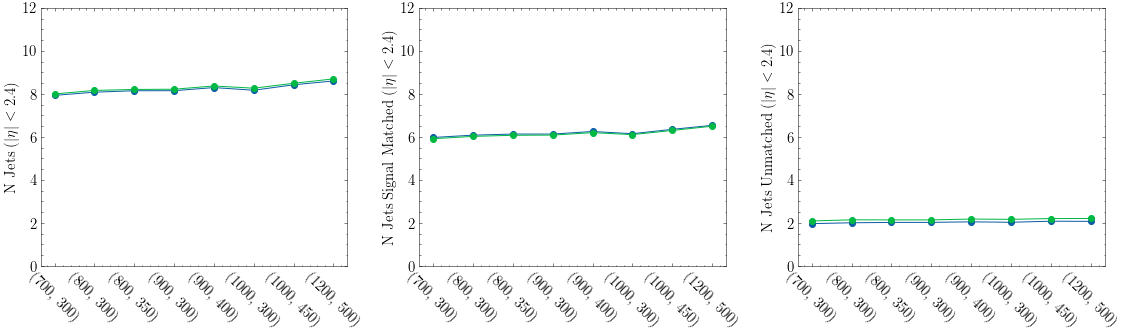

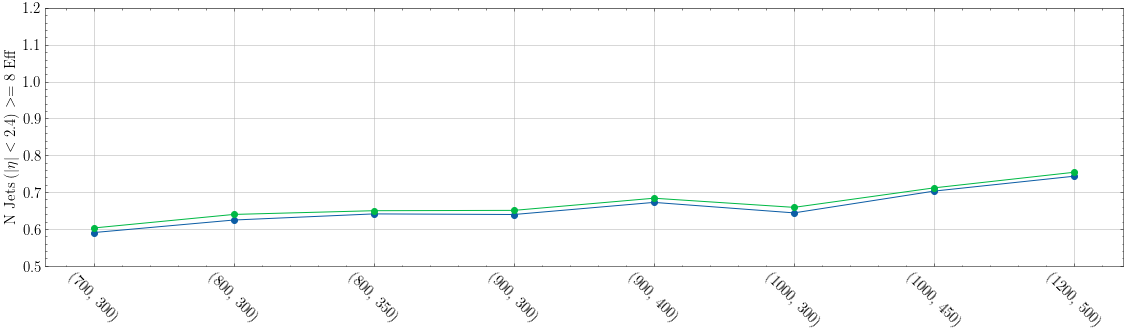

In [28]:
varlist = ['n_eta_tagged','n_matched_eta_tagged','n_unmatched_eta_tagged']
xlabels = ['N Jets ($|\eta|<2.4$)','N Jets Signal Matched ($|\eta|<2.4$)','N Jets Unmatched ($|\eta|<2.4$)']
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    s_colors=[None],
    # cumulative=-1,
    dim=(-1,len(varlist)),
    xlabels=xlabels
)

fig,axs = plt.subplots(ncols=len(varlist),figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylabel=xlabel,ylim=(0,12),figax=(fig,axs.flatten()[i]))
    
fig.tight_layout()

fig,axs = plt.subplots(figsize=(16,5))
eff = np.array([ ak.sum(t[varlist[0]]>=8)/ak.count(t[varlist[0]]) for t in signal_trees ])
eff_pu = np.array([ ak.sum(t[varlist[0]]>=8)/ak.count(t[varlist[0]]) for t in signal_trees_pu ])
graph_multi(signal_points,[eff,eff_pu],xlabel=signal_points,ylim=(0.5,1.2),ylabel=f'{xlabels[0]} $>= 8$ Eff',grid=True,figax=(fig,axs))
fig.tight_layout()

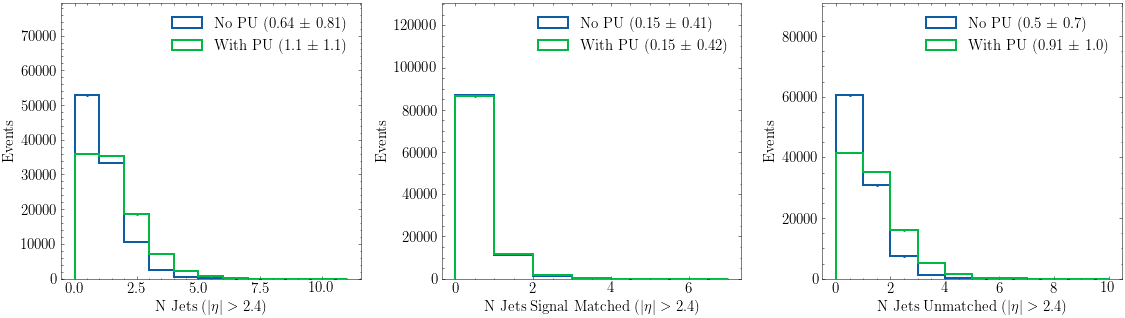

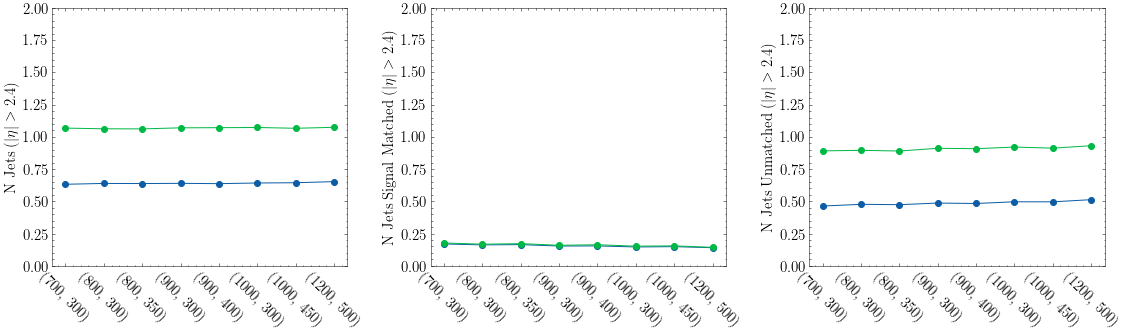

In [29]:
varlist = ['n_eta_untagged','n_matched_eta_untagged','n_unmatched_eta_untagged']
xlabels = ['N Jets ($|\eta|>2.4$)','N Jets Signal Matched ($|\eta|>2.4$)','N Jets Unmatched ($|\eta|>2.4$)']
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    s_colors=[None],
    dim=(-1,len(varlist)),
    xlabels=xlabels
)

fig,axs = plt.subplots(ncols=len(varlist),figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylabel=xlabel,ylim=(0,2),figax=(fig,axs.flatten()[i]))
    
fig.tight_layout()